In [13]:
import numpy as np
import pandas as pd 
from sklearn import linear_model
from word2number import w2n

In [14]:
df=pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [15]:
df.experience= df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [17]:
df = df.rename(columns={'test_score(out of 10)': 'test_score'})
df

,experience,test_score,interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [23]:
med=df.test_score.median()

In [24]:
df.test_score=df.test_score.fillna(med)

In [25]:
df

,experience,test_score,interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [26]:
df.experience=df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [30]:
df=df.rename(columns={'salary($)':'salary'})
df

,experience,test_score,interview_score(out of 10),salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [36]:
reg=linear_model.LinearRegression()
reg.fit(df[['experience','test_score','interview_score(out of 10)']],df.salary)

LinearRegression()

In [37]:
reg.predict([[2,9,6]])

array([53205.96797671])

In [38]:
reg.predict([[12,10,10]])

array([92002.18340611])

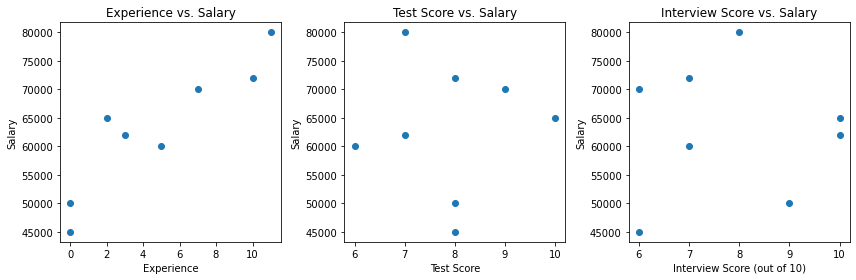

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df' containing your data
# Replace 'df' with the actual name of your DataFrame

# Scatter plot for 'experience' vs. 'salary'
plt.figure(figsize=(12, 4))
plt.subplot(131)  # 1 row, 3 columns, first subplot
plt.scatter(df['experience'], df['salary'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience vs. Salary')

# Scatter plot for 'test_score' vs. 'salary'
plt.subplot(132)  # Second subplot
plt.scatter(df['test_score'], df['salary'])
plt.xlabel('Test Score')
plt.ylabel('Salary')
plt.title('Test Score vs. Salary')

# Scatter plot for 'interview_score' vs. 'salary'
plt.subplot(133)  # Third subplot
plt.scatter(df['interview_score(out of 10)'], df['salary'])
plt.xlabel('Interview Score (out of 10)')
plt.ylabel('Salary')
plt.title('Interview Score vs. Salary')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()
